In [23]:
import pandas as pd
pd.options.display.max_columns =200

import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
import seaborn as sns

In [6]:
# Data downloads
svi = pd.read_csv("/Volumes/GoogleDrive/My Drive/CSR/01_Projects/2003_politics_of_care/03_data/svi_state_ranked/SVI 2018 State Data.csv")
health = pd.read_csv("/Volumes/GoogleDrive/My Drive/CSR/01_Projects/2003_politics_of_care/03_data/county_health_rankings/analytic_data2020_0.csv")
covid = covid = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv")

total_covid = covid[covid['date']=='2020-08-10']

In [17]:
# merging data
health_cols = ['5-digit FIPS Code',
       'State Abbreviation', 'Name', 'Release Year',
       'County Ranked (Yes=1/No=0)', 'Premature death raw value']
svi_health = svi.merge(health[health_cols],left_on='FIPS',
                       right_on='5-digit FIPS Code',
                      how='left')

svi_health_covid = svi_health.merge(total_covid,
                                    left_on='FIPS',right_on='fips',how='left')

In [25]:
svi_health_covid['cases_pop']=svi_health_covid['cases']/svi_health_covid['E_TOTPOP']

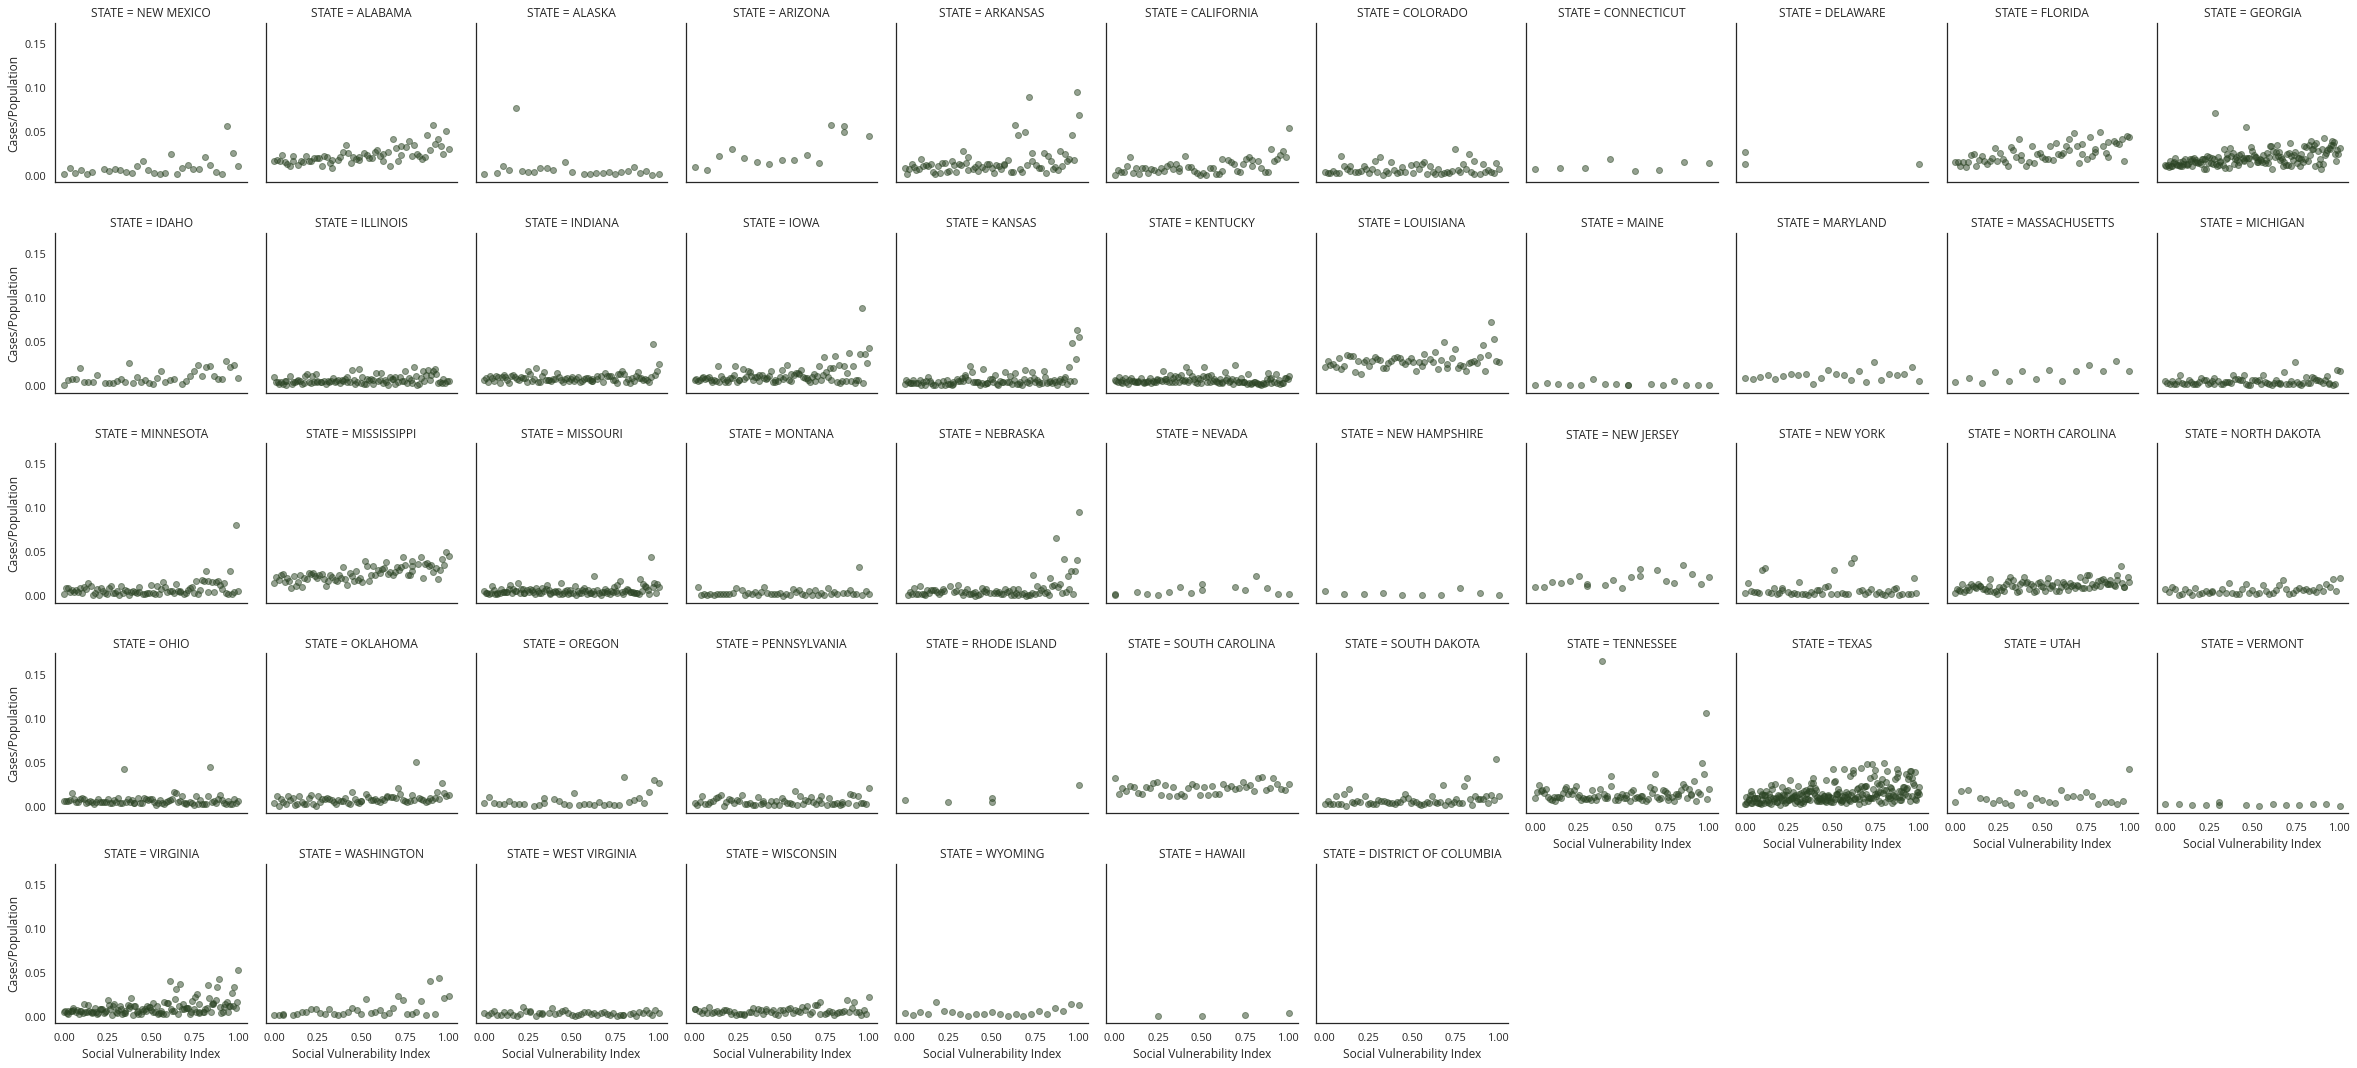

In [26]:
sns.set(font='Open Sans',style="white")
all_counties = sns.FacetGrid(svi_health_covid,col='STATE',col_wrap=11)
all_counties = all_counties.map(plt.scatter, "RPL_THEMES_ST", "cases_pop", alpha=0.5,color='#2C4525').set_axis_labels('Social Vulnerability Index','Cases/Population')

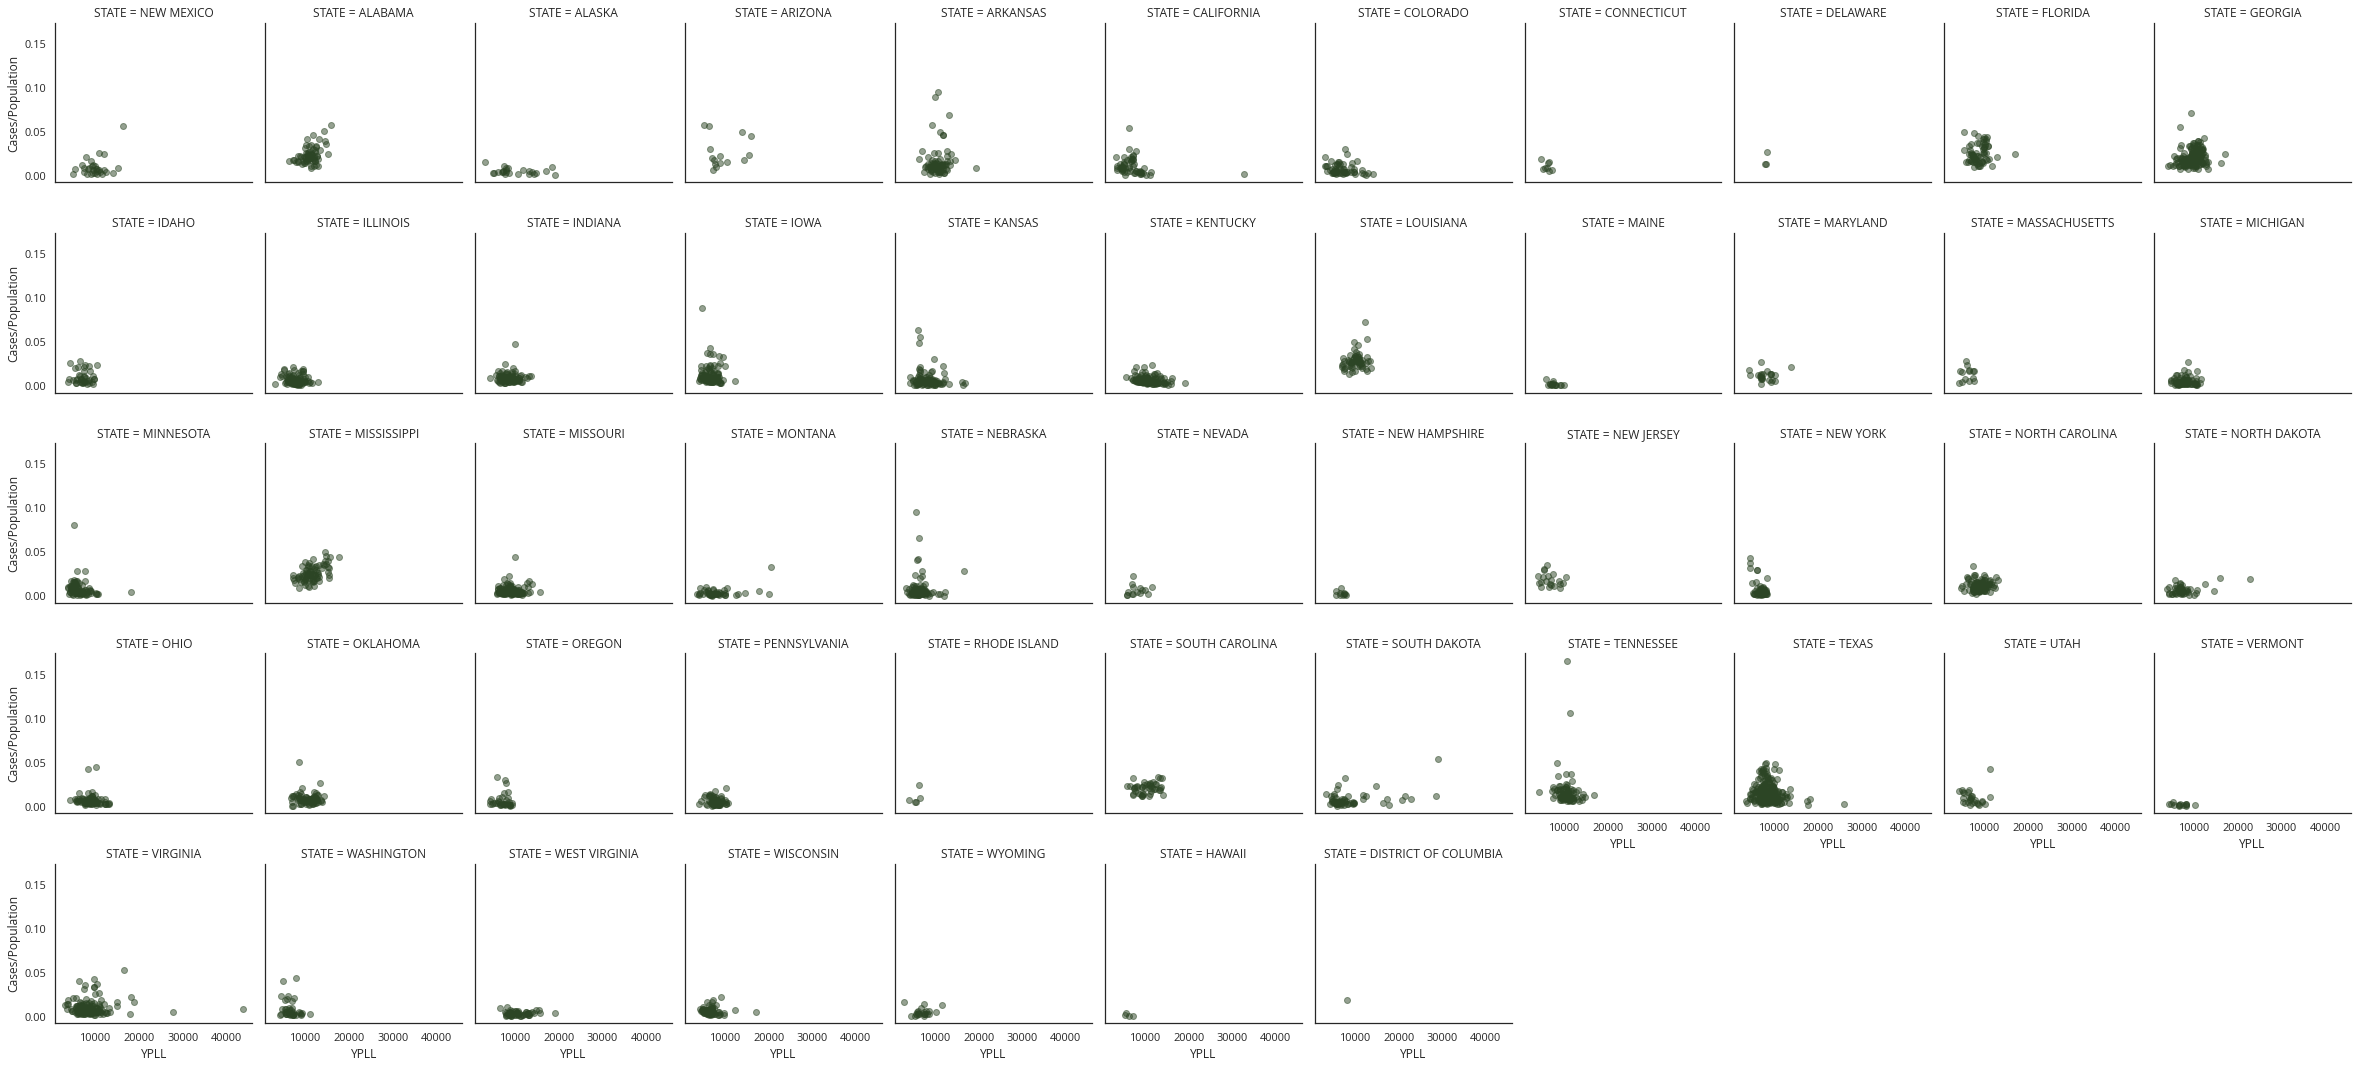

In [28]:
sns.set(font='Open Sans',style="white")
all_counties = sns.FacetGrid(svi_health_covid,col='STATE',col_wrap=11)
all_counties = all_counties.map(plt.scatter, "Premature death raw value", "cases_pop", alpha=0.5,color='#2C4525').set_axis_labels('YPLL','Cases/Population')

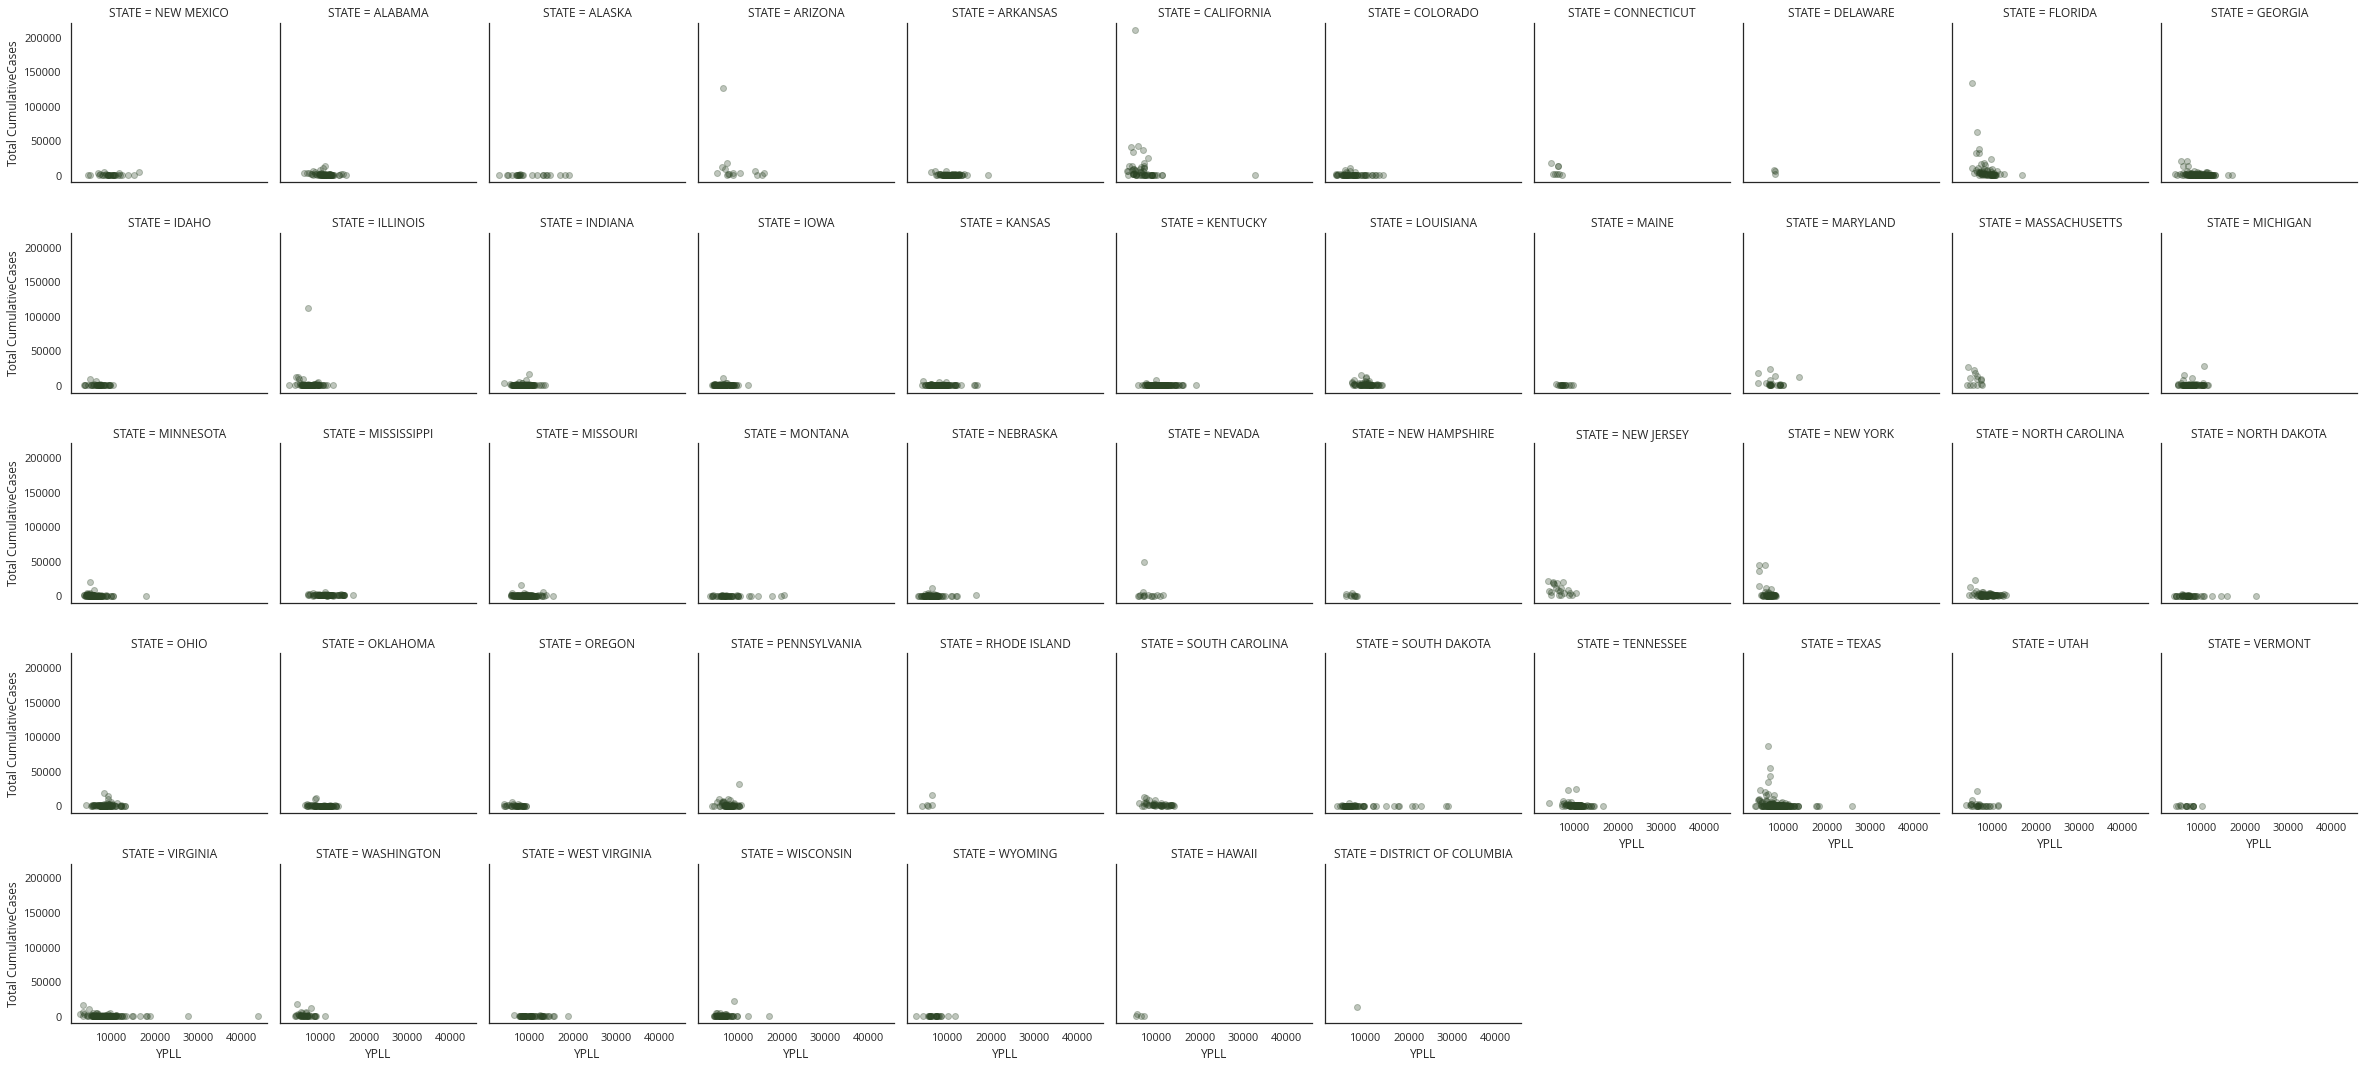

In [47]:
sns.set(font='Open Sans',style="white")
all_counties = sns.FacetGrid(svi_health_covid,col='STATE',col_wrap=11)
all_counties = all_counties.map(plt.scatter, "Premature death raw value", "cases", alpha=0.3,color='#2C4525').set_axis_labels('YPLL','Total CumulativeCases')

<ipython-input-63-ebff31f7c93e>:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


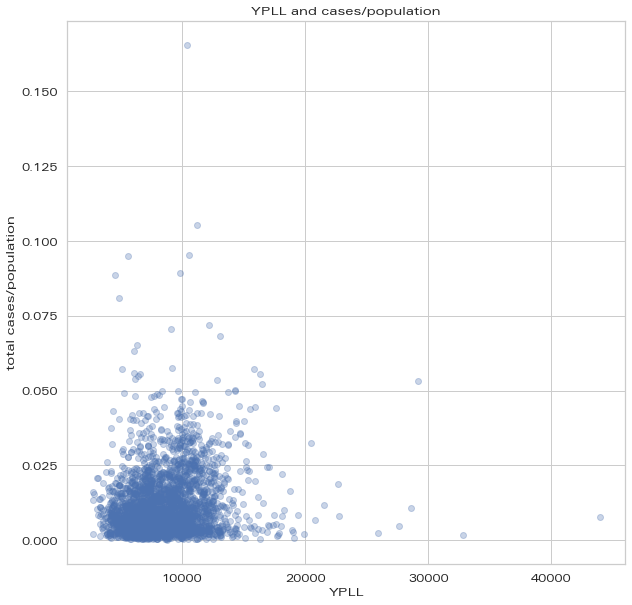

In [63]:
sns.set(font='Univers',style="whitegrid")

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter("Premature death raw value","cases_pop",
            data=svi_health_covid,alpha=0.3)
ax.set(xlabel="YPLL",ylabel="total cases/population")
ax.set_title("YPLL and cases/population")
fig.show()

Text(0.5, 1.0, 'YPLL and cases')

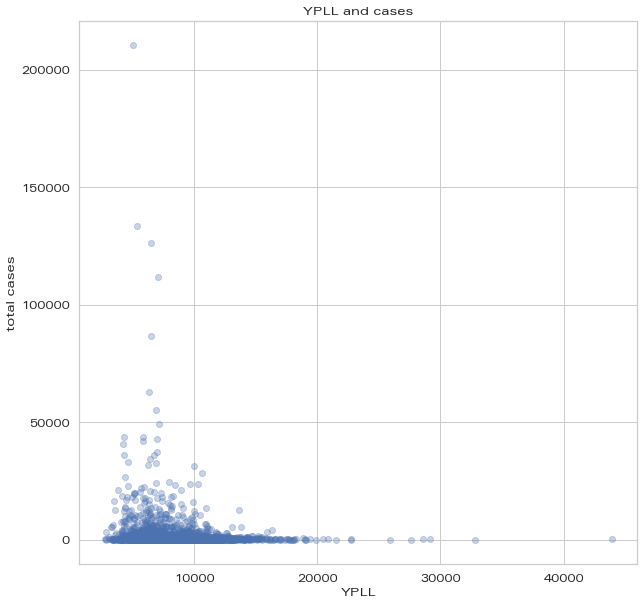

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter("Premature death raw value","cases",
            data=svi_health_covid,alpha=0.3)
ax.set(xlabel="YPLL",ylabel="total cases")
ax.set_title("YPLL and cases")

Text(0.5, 1.0, 'SVI and cases')

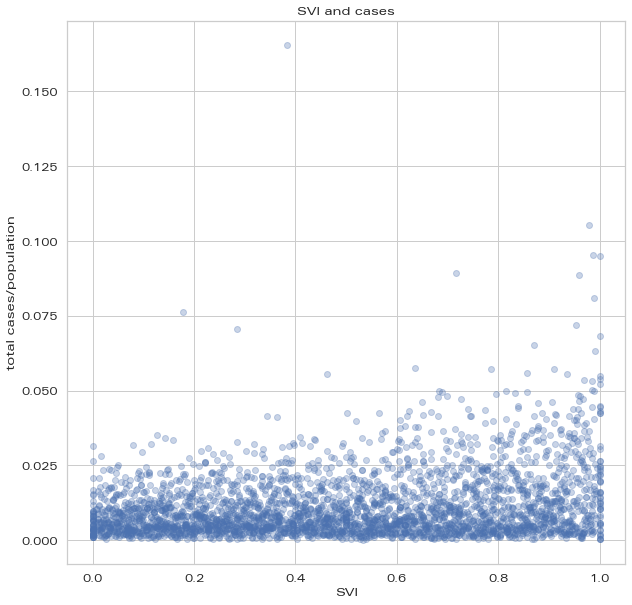

In [65]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter("RPL_THEMES_ST","cases_pop",
            data=svi_health_covid,alpha=0.3)
ax.set(xlabel="SVI",ylabel="total cases/population")
ax.set_title("SVI and cases")

Text(0.5, 1.0, 'SVI and total cases')

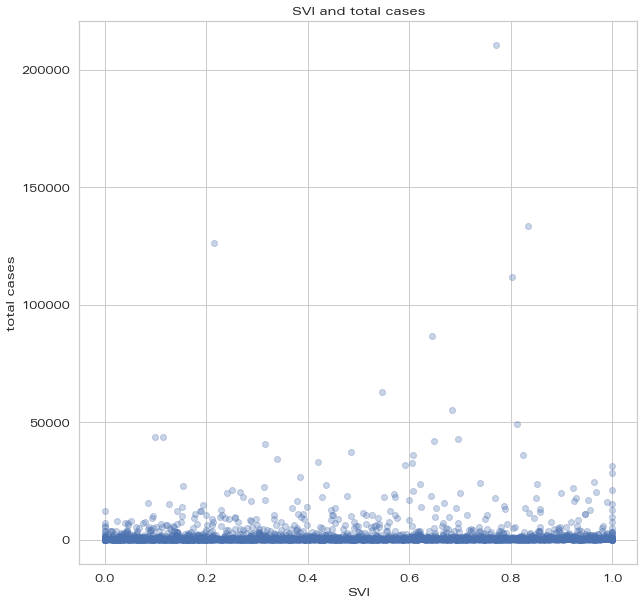

In [66]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter("RPL_THEMES_ST","cases",
            data=svi_health_covid,alpha=0.3)
ax.set(xlabel="SVI",ylabel="total cases")
ax.set_title("SVI and total cases")